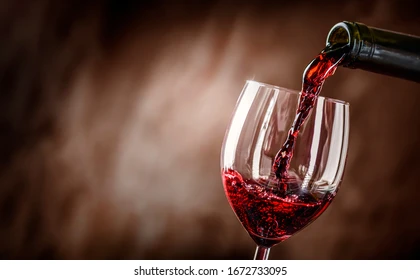

# import necessary library 

In [116]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing dataset 

In [117]:
# load the dataframe
df=pd.read_csv("red-wine.csv")

In [118]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

Here the quality is our target variable where we have an arbitary cutoff eg. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. we need to pridict the wine quality with the help of classification paramaters and make an classification model.

In [119]:
# this can show first 5 rows 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
# this can show last five rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Data Description
Fixed Acidity : are non-volatile acids that do not evaporate readily

Volatile Acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste

Citric Acid: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

Residual Sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

Chlorides: the amount of salt in the wine

Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine

Total Sulfur Dioxide: is the amount of free + bound forms of SO2

Density: sweeter wines have a higher density

pH: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

Alcohol: available in small quantities in wines makes the drinkers sociable

Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

Quality: which is the output variable/predictor

In [121]:
# to check the null values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there is not even a single null value present in this column

In [122]:
# to check the full info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


By summarizing from the above 

there is 12 columns in the dataset which contains 2 datatypes values which are float and int.

There are total 12 columns present with 1599 rows

# Exploratory data analysis (EDA)

In [123]:
# checking the dimensions
df.shape

(1599, 12)

As we see there is 1599 rows and 12 columns out of which 1 is our target variable and remaining 11 values are our independent variables.

In [124]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [125]:
# checking the columns of the dataset
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [126]:
# checking the types of the columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

 There are two types of data( float64 and int64) present in this dataset 

In [127]:
# checking the null values in this dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [128]:
# this can give an whole info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we see there are no null value present in the dataset

<AxesSubplot:>

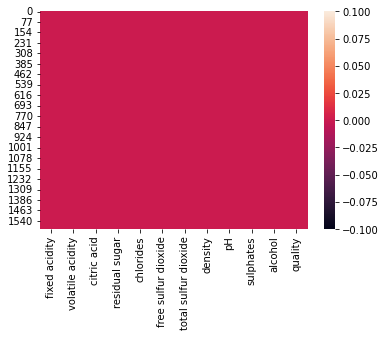

In [129]:
# lets visuliaze the dataset
sns.heatmap(df.isnull())

In [130]:
# checking the value counts for each column
for i in df.columns:
    print(df[i].value_counts)
    print("\n")

<bound method IndexOpsMixin.value_counts of 0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric acid, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1594    2.0
1595    2.2
1596    2.3
1597    2.0
1598    3.6
Name: residual sugar, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_coun

# Description of dataset 

In [131]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


this gives the stastics summary of the dataset.this dataset looks perfect because there is no negative values present

from the above description we can observe that.

1)the counts of all the columns are same it means that there is no missing values present in this dataset

2)the mean is greator than the median value(50%) in all the columns except density and quality which means  the data is skewed right side in these columns.

3) the mean value is less than the median value in two columns which are quality and desntiy which means the data is skewed to left side in these columns

4) by summarizing the data we obeserv that there is huge diffrence between max and 75% in some columns hence there is outliers present 

5) we also notice the min,25% and standard deviation from this method

6) The quality of wine varies from 3 to 8, where 7 is the average quality.

7) The maximum alcohol level in the wine is 14.9 and minimum is 8.4

8) The pH level of wine varies between 2.74 to 4.01.

9) The average density of wine is 0.9956.

10) Total sulpher dioxide varies between 6.0 to 289.0.

# Data Visualizaton

In [132]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Univariate analysis 

<AxesSubplot:xlabel='quality', ylabel='count'>

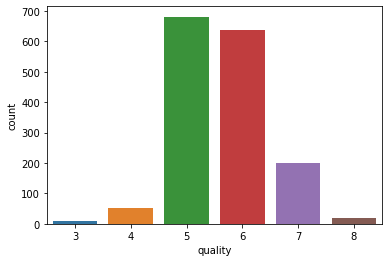

In [133]:
# univariate analysis
ax=sns.countplot(x='quality',data=df)
ax

from the above obesrvation we see that there are 6 types of quality numbers are given which are 3,4,5,6,7,8 from that the quality number 5 has the higest and the quality number 3 has the lowest

<AxesSubplot:xlabel='alcohol', ylabel='count'>

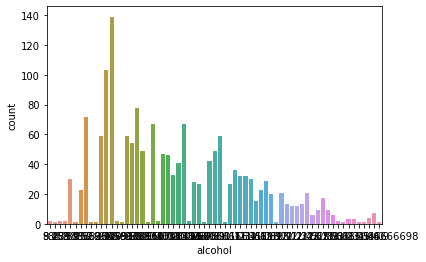

In [134]:
sns.countplot(x='alcohol',data=df)

<AxesSubplot:xlabel='citric acid', ylabel='count'>

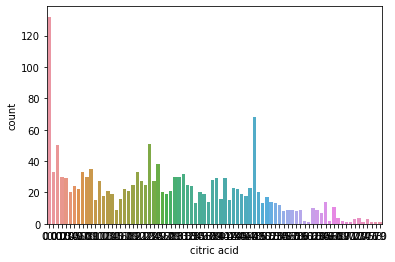

In [135]:
sns.countplot(x='citric acid',data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='count'>

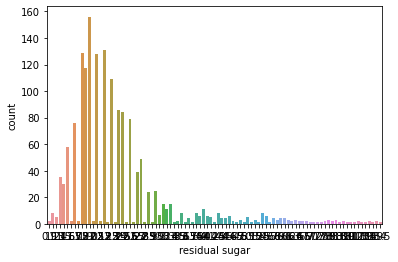

In [136]:
sns.countplot(x='residual sugar',data=df)

<AxesSubplot:xlabel='chlorides', ylabel='count'>

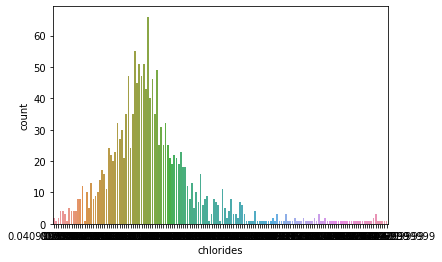

In [137]:
sns.countplot(x='chlorides',data=df)

<AxesSubplot:xlabel='volatile acidity', ylabel='count'>

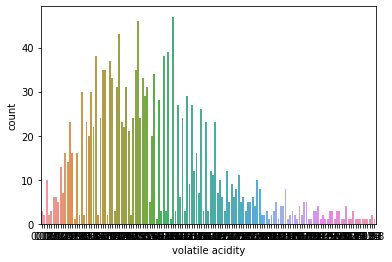

In [138]:
sns.countplot(x='volatile acidity',data=df)

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

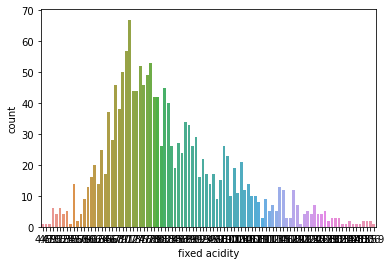

In [139]:
sns.countplot(x='fixed acidity',data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='count'>

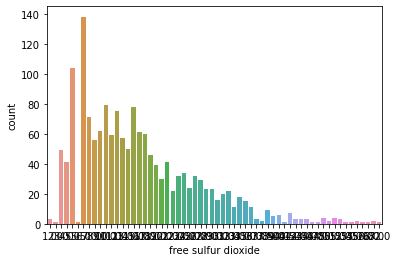

In [140]:
sns.countplot(x='free sulfur dioxide',data=df)

In [141]:
# Start with plotting Histogram

cols_name = list(df.columns)
cols_name


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

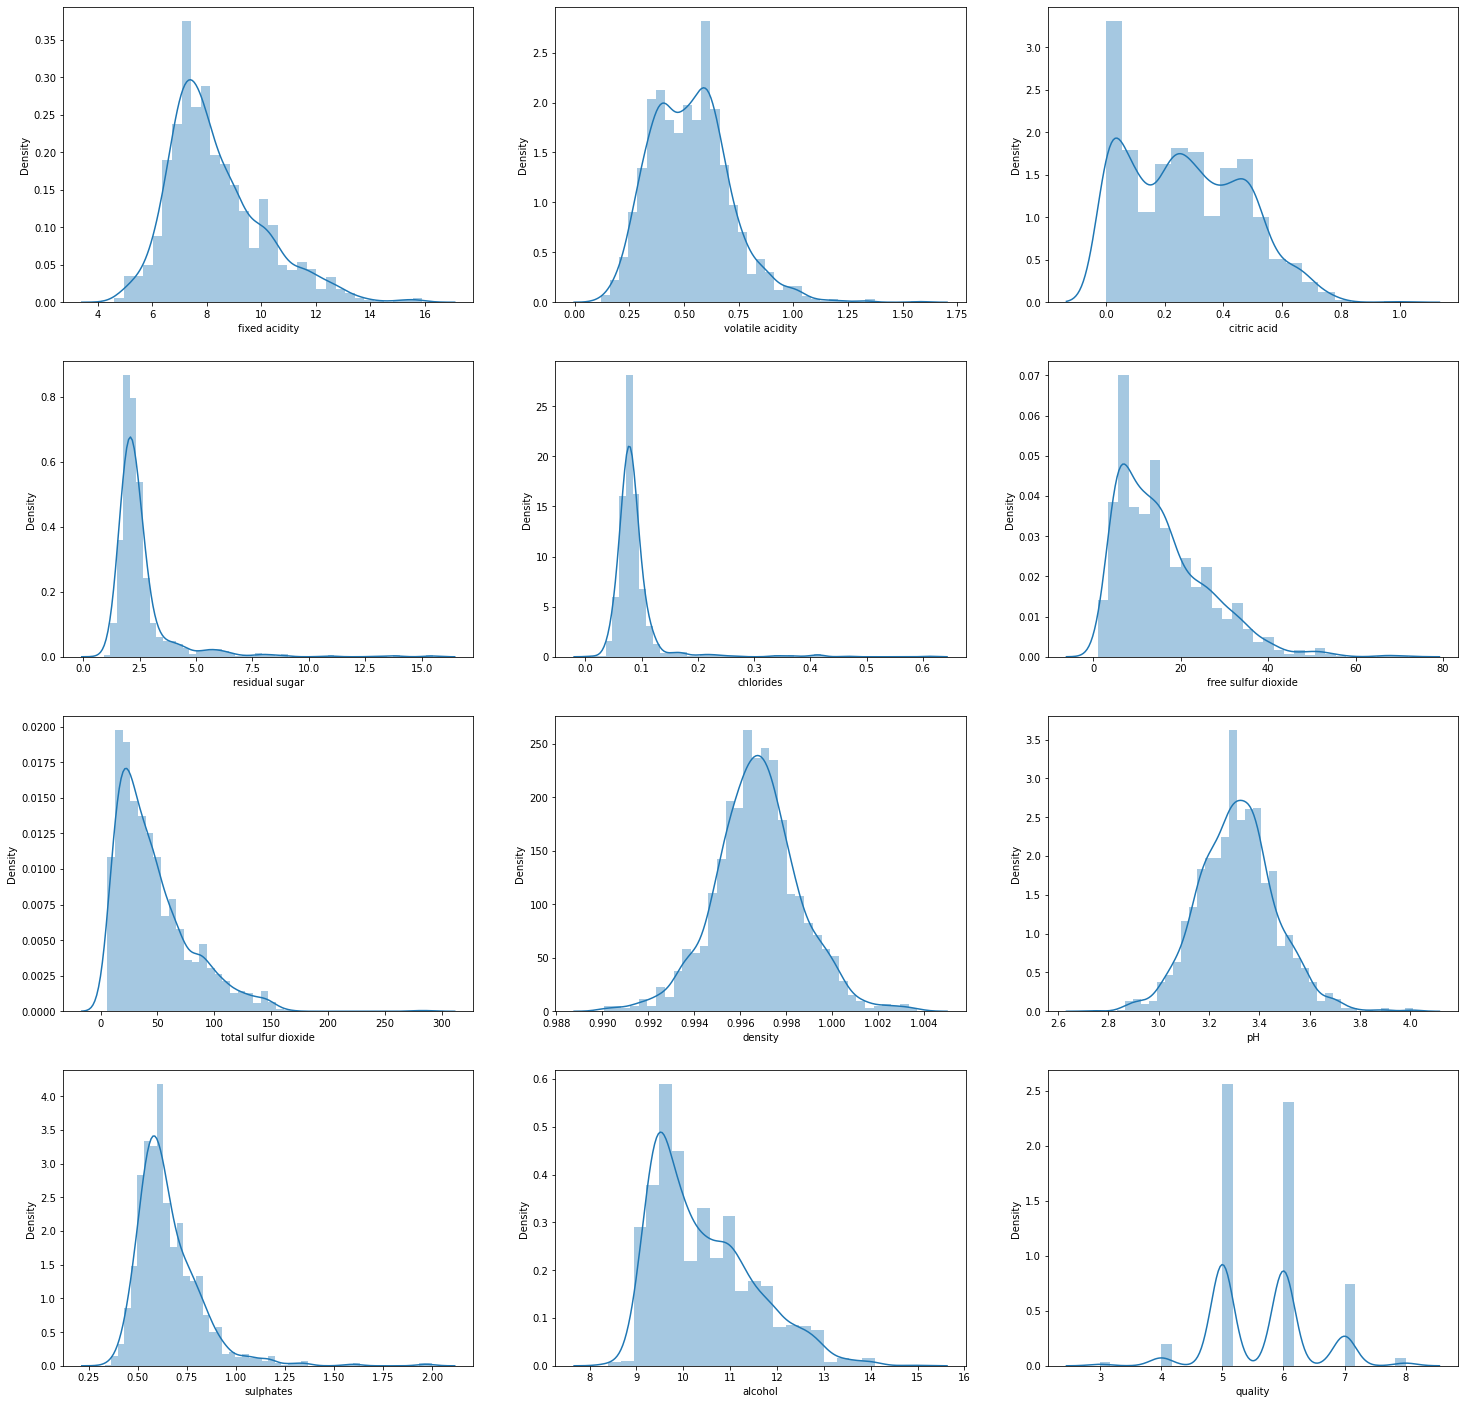

In [142]:
plt.figure(figsize = (25,25))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.distplot(df[cols_name[i-1]])
plt.show()

Some Features Contains Normal / Gaussian Distribution

Some Features have 'right skewness' - residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates

Let's try to apply Log Transformation or cbrt method to these features

# bivariate analysis 

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

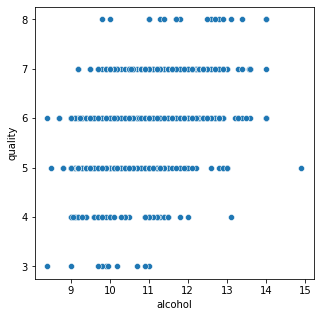

In [143]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='alcohol',y='quality',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

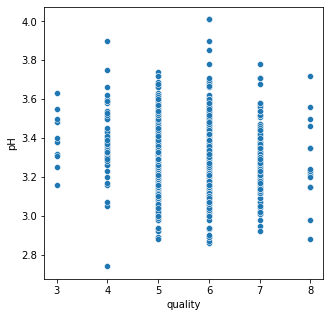

In [144]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality',y='pH',data=df)

the quality 5 ,6 and 7 have the lower ph values

<AxesSubplot:xlabel='quality', ylabel='density'>

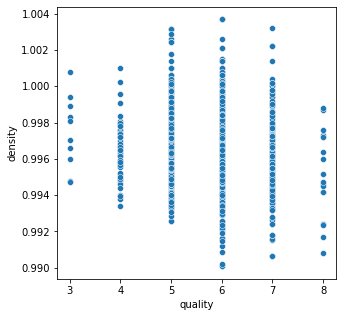

In [145]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality',y='density',data=df)

wuality 5,6,and 7 having the moderate denstiy of wine

<AxesSubplot:xlabel='quality', ylabel='density'>

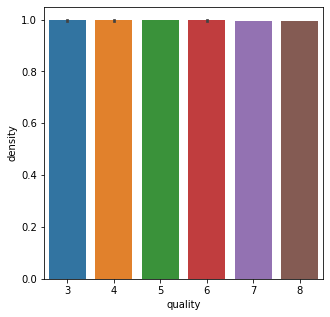

In [146]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=df)

as we see from the above the density having same for all the  quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

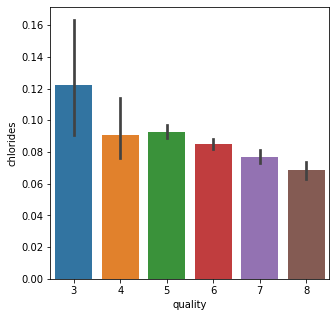

In [147]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=df)

In [148]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

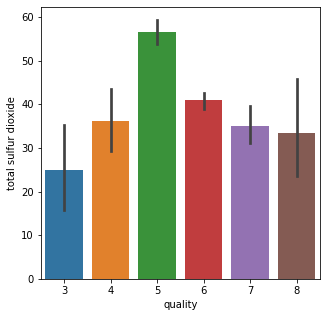

In [149]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

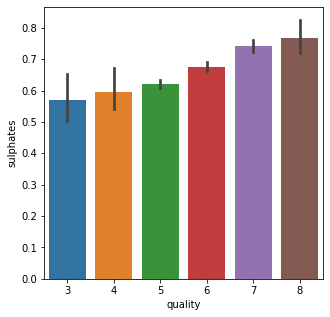

In [150]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

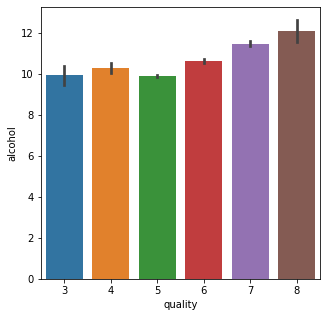

In [151]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=df)

# time to chek the outliers

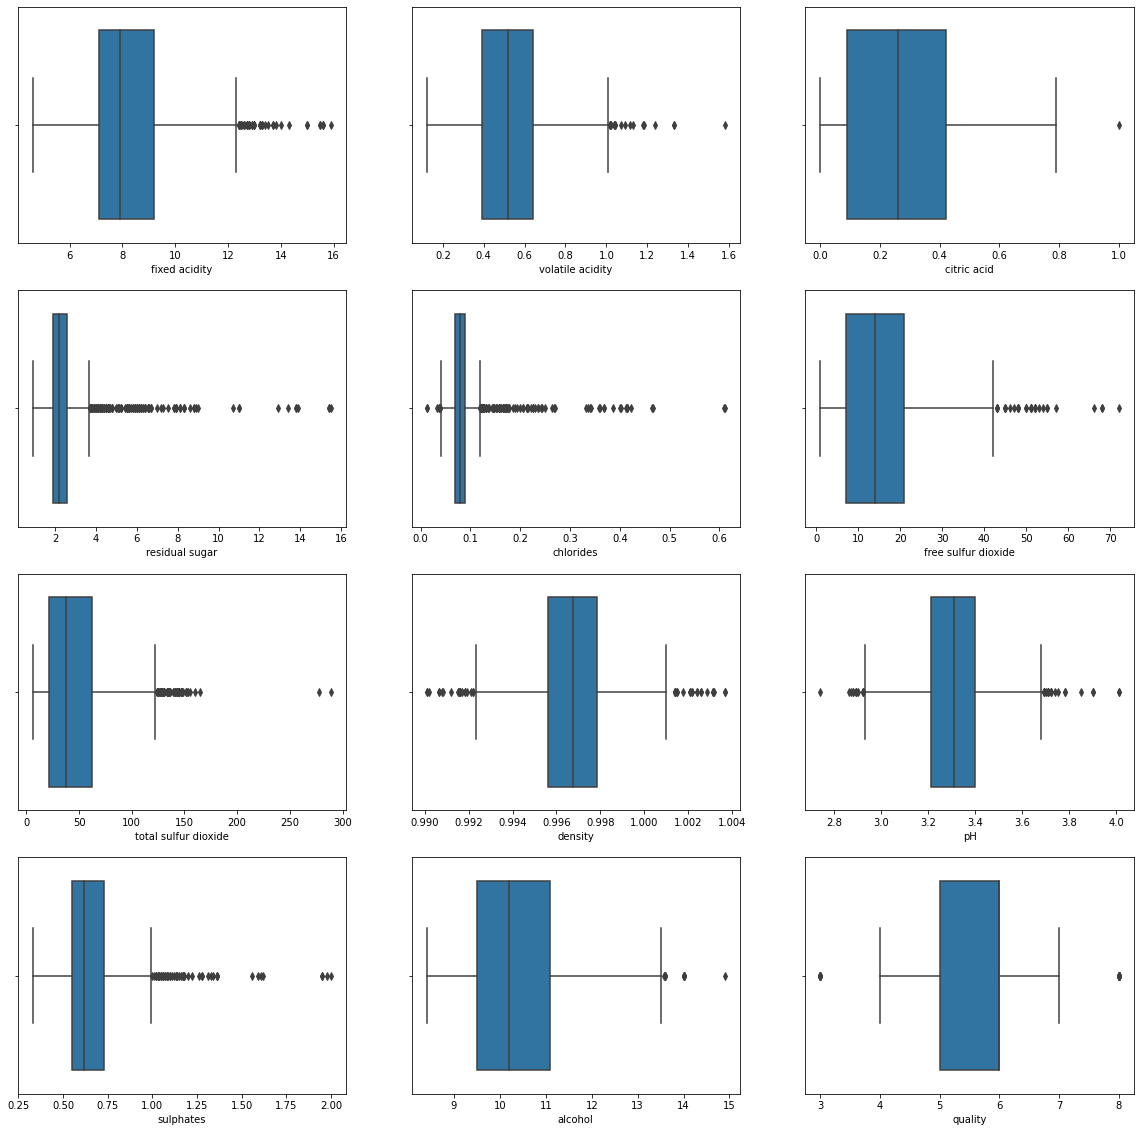

In [152]:
plt.figure(figsize = (20,20))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[cols_name[i-1]])
plt.show()

# to check skewnes we use skew(). The range is in between -ve 0.5 to +ve 0.5
df.skew()

From the above we see that there is skewness present in the different column in the dataset which are not in range.

There are different methods or techniques to solve the skewness problem which are log,cubroot method ect.

we are using cbrt method to remove the skewness

first we make a list of the columns in which the skewness is present except the target variable which is quality

In [153]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# lets remove the skewness from the dataset 

In [154]:
sk_list=['fixed acidity','volatile acidity','residual sugar',
         'chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

In [155]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

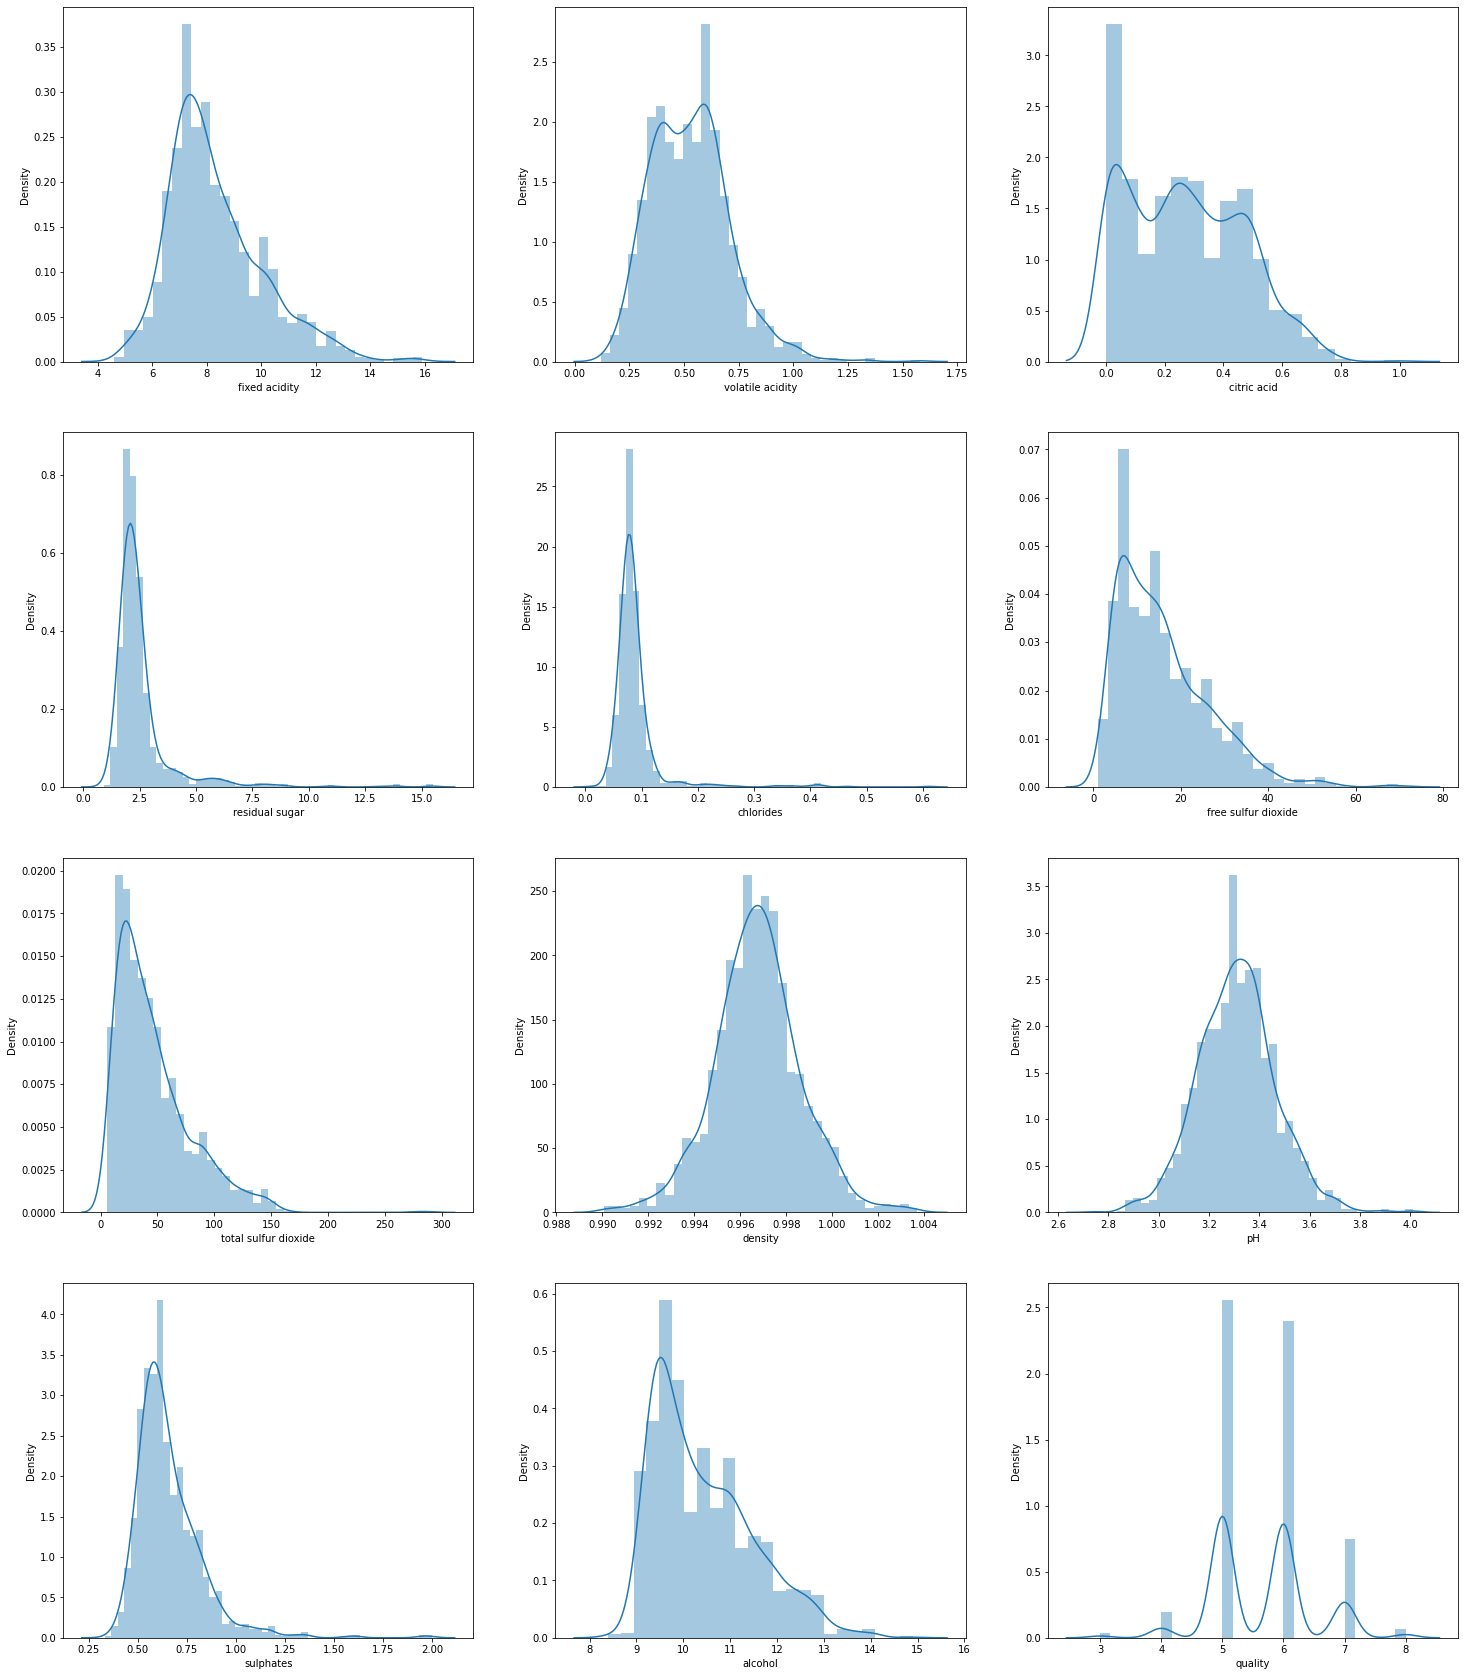

In [156]:
plt.figure(figsize = (25,30))

for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.distplot(df[cols_name[i-1]])
plt.show()

In [157]:
for i in sk_list:
    df[i]=np.cbrt(df[i])
    

In [158]:
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
dtype: float64

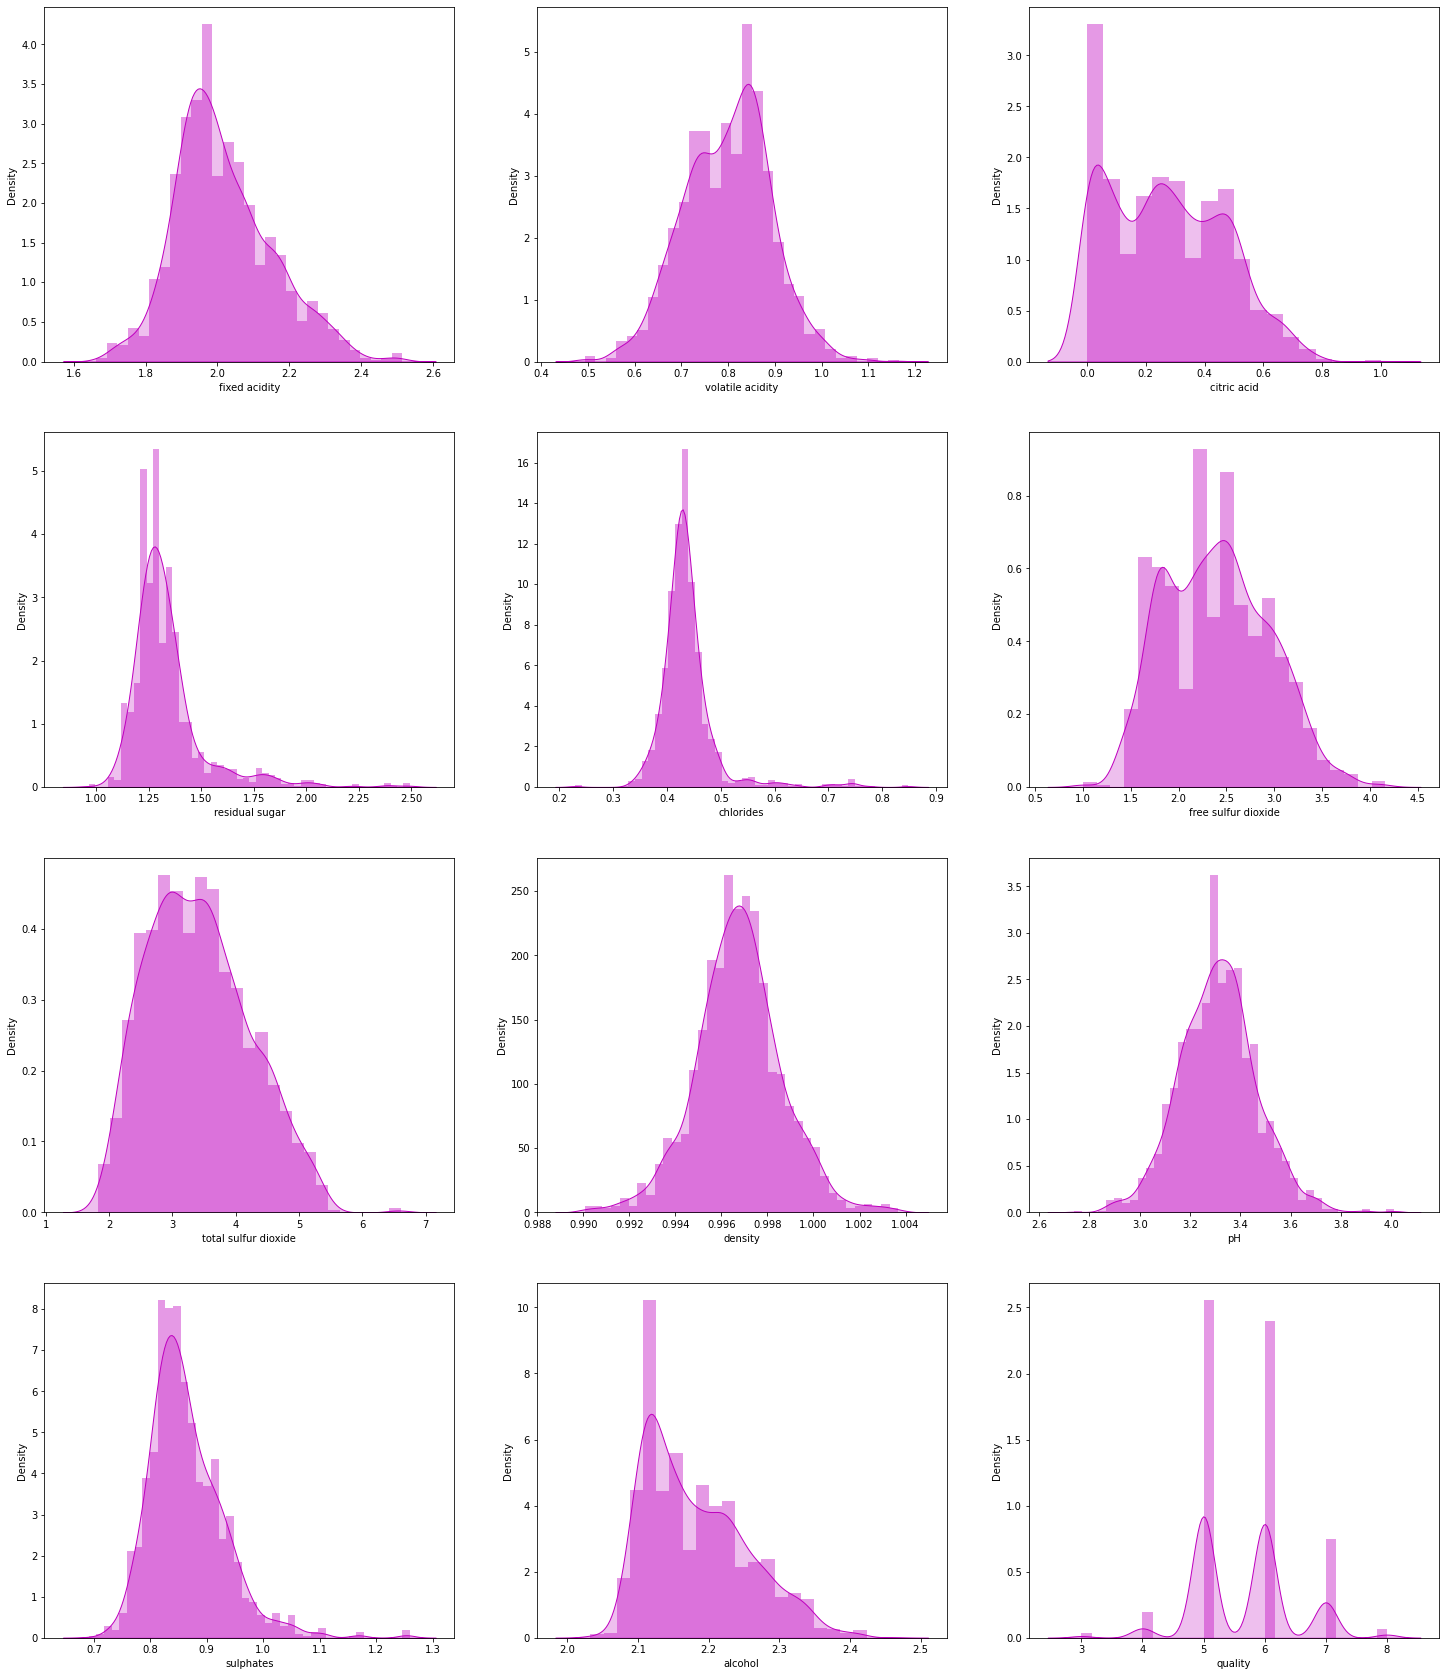

In [159]:
plt.figure(figsize = (25,30))

for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.distplot(df[cols_name[i-1]],color='m',kde_kws={'shade':True})
plt.show()

In [160]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.017049,0.797710,0.270976,1.337840,0.436584,2.397125,3.413073,0.996747,3.311113,0.864522,2.181953,5.636023
std,0.135981,0.092036,0.194801,0.179776,0.053722,0.535717,0.797571,0.001887,0.154386,0.066930,0.072724,0.807569
min,1.663103,0.493242,0.000000,0.965489,0.228943,1.000000,1.817121,0.990070,2.740000,0.691042,2.032793,3.000000
25%,1.921997,0.730614,0.090000,1.238562,0.412129,1.912931,2.802039,0.995600,3.210000,0.819321,2.117912,5.000000
50%,1.991632,0.804145,0.260000,1.300591,0.429084,2.410142,3.361975,0.996750,3.310000,0.852702,2.168703,6.000000
75%,2.095379,0.861774,0.420000,1.375069,0.448140,2.758924,3.957892,0.997835,3.400000,0.900411,2.230699,6.000000
max,2.514581,1.164713,1.000000,2.493315,0.848556,4.160168,6.611489,1.003690,4.010000,1.259921,2.460719,8.000000


In [161]:
# Some interesting conclusion to be noted that
# Although there are a total of 240 duplicate rows, 
# we will not be removing them.
# This is because we are assuming that this survey was made by different unique wine tasters who may have given same ratings.

df.duplicated().sum()

240

In [162]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454,5
1,1.983192,0.958284,0.00,1.375069,0.461044,2.924018,4.061548,0.9968,3.20,0.879366,2.139975,5
2,1.983192,0.912581,0.04,1.320006,0.451436,2.466212,3.779763,0.9970,3.26,0.866239,2.139975,5
3,2.237378,0.654213,0.56,1.238562,0.421716,2.571282,3.914868,0.9980,3.16,0.833955,2.139975,6
4,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454,5


# corelation between the target variable and the feature

In [163]:
corr=df.corr()

In [164]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.264748,0.670553,0.154116,0.164063,-0.173739,-0.115392,0.673615,-0.699735,0.196146,-0.082908,0.118123
volatile acidity,-0.264748,1.000000,-0.566698,0.025464,0.106009,0.017797,0.093119,0.037685,0.229324,-0.288941,-0.222070,-0.393764
citric acid,0.670553,-0.566698,1.000000,0.165255,0.192801,-0.080850,0.009224,0.364947,-0.541904,0.327678,0.109388,0.226373
residual sugar,0.154116,0.025464,0.165255,1.000000,0.093468,0.119639,0.171429,0.401010,-0.091009,0.017832,0.070057,0.020657
chlorides,0.164063,0.106009,0.192801,0.093468,1.000000,-0.007952,0.068634,0.303230,-0.282776,0.287061,-0.281050,-0.161767
free sulfur dioxide,-0.173739,0.017797,-0.080850,0.119639,-0.007952,1.000000,0.757872,-0.036124,0.089701,0.054612,-0.079680,-0.051243
total sulfur dioxide,-0.115392,0.093119,0.009224,0.171429,0.068634,0.757872,1.000000,0.095461,-0.031335,0.044914,-0.232059,-0.180815
density,0.673615,0.037685,0.364947,0.401010,0.303230,-0.036124,0.095461,1.000000,-0.341699,0.161109,-0.492844,-0.174919
pH,-0.699735,0.229324,-0.541904,-0.091009,-0.282776,0.089701,-0.031335,-0.341699,1.000000,-0.168561,0.206050,-0.057731
sulphates,0.196146,-0.288941,0.327678,0.017832,0.287061,0.054612,0.044914,0.161109,-0.168561,1.000000,0.123558,0.292537


<AxesSubplot:>

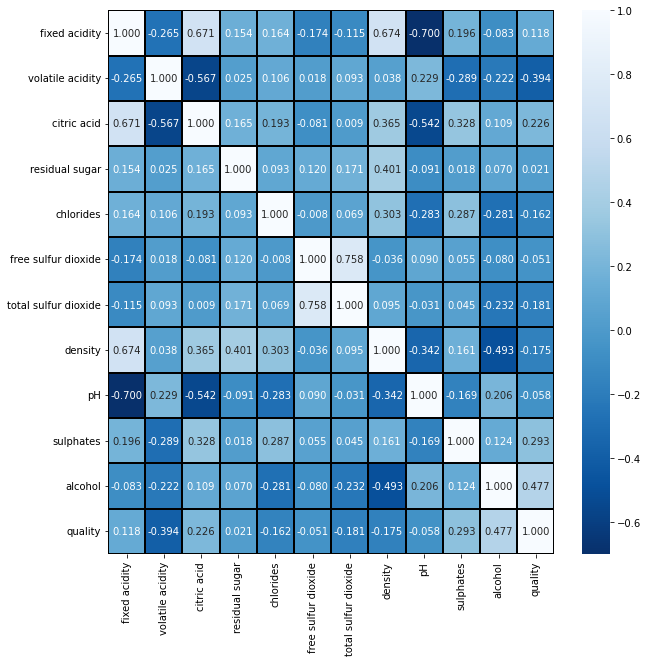

In [165]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,fmt='0.3f',linecolor='Black',cmap="Blues_r")

In [166]:
# converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 8)

#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)

df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [167]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476928
sulphates               0.292537
citric acid             0.226373
fixed acidity           0.118123
residual sugar          0.020657
free sulfur dioxide    -0.051243
pH                     -0.057731
chlorides              -0.161767
density                -0.174919
total sulfur dioxide   -0.180815
volatile acidity       -0.393764
Name: quality, dtype: float64

# seprating the tagret and the features variables 

In [168]:
x=df.drop('quality',axis=1)
x.shape

(1599, 11)

In [169]:
y=df['quality']
y.shape

(1599,)

# now its time to scaling the values 

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
sc=StandardScaler()

In [172]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [173]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.502833,0.980285,-1.391472,-0.552402,-0.242092,-0.323303,-0.217554,0.558274,1.288643,-0.601783,-0.983467
1,-0.249061,1.745223,-1.391472,0.207150,0.455439,0.983836,0.813317,0.028261,-0.719933,0.221852,-0.577411
2,-0.249061,1.248486,-1.186070,-0.099231,0.276540,0.129002,0.459903,0.134264,-0.331177,0.025664,-0.577411
3,1.620799,-1.559625,1.484154,-0.552402,-0.276838,0.325192,0.629351,0.664277,-0.979104,-0.456840,-0.577411
4,-0.502833,0.980285,-1.391472,-0.552402,-0.242092,-0.323303,-0.217554,0.558274,1.288643,-0.601783,-0.983467


we scale the data to over the issue of the biasness

# checking the vif for multicolinearity 

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [175]:
vif=pd.DataFrame()

In [176]:
vif['vif_calues']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [177]:
vif

,vif_calues,features
0,8.258480,fixed acidity
1,1.871827,volatile acidity
2,3.096028,citric acid
3,1.907233,residual sugar
4,1.442266,chlorides
5,2.587490,free sulfur dioxide
6,2.867303,total sulfur dioxide
7,7.319135,density
8,3.538390,pH
9,1.413570,sulphates


##### we can take the threshold 5 for the vif range we have to droped the fixed acidity column to make it in range 

In [178]:
x.drop('fixed acidity',inplace=True,axis=1)

In [179]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [180]:
vif

,vif_values,features
0,1.871822,volatile acidity
1,2.828203,citric acid
2,1.491807,residual sugar
3,1.380411,chlorides
4,2.554074,free sulfur dioxide
5,2.740063,total sulfur dioxide
6,2.585758,density
7,1.616057,pH
8,1.362887,sulphates
9,2.262291,alcohol


by summarizing the above it seems that our vif is in range

In [181]:
y.value_counts()

good    855
bad     744
Name: quality, dtype: int64

now we see the data is imbalanced so we have to balance the dataset using the oversampling method"

# oversampling

In [182]:
from imblearn.over_sampling import SMOTE

In [183]:
sm=SMOTE()

In [184]:
x,y=sm.fit_resample(x,y)

In [185]:
y.value_counts()

bad     855
good    855
Name: quality, dtype: int64

Now the data is balanced and its time to go for model building

In [186]:
y.to_frame()

,quality
0,bad
1,bad
2,bad
3,good
4,bad
...,...
1705,bad
1706,bad
1707,bad
1708,bad


In [187]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32>

<AxesSubplot:xlabel='quality', ylabel='count'>

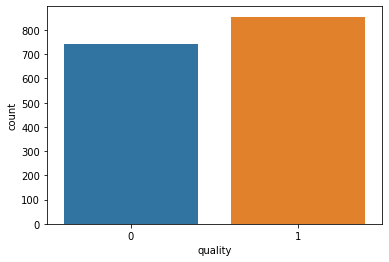

In [188]:
# plot the count plot to visuliaze the quality columns

sns.countplot(df['quality'])

The quality of wine can be descrie in two ways 1 for the good and 0 for the bad

# model building 

In [189]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
from sklearn.model_selection import train_test_split,cross_val_score

In [192]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report

In [193]:
from sklearn.svm import SVC

# its time to find the best accuracy at best random state 

In [194]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        
print("the best accuracy is : ",maxAcc," at random state is : ",maxRs)

the best accuracy is :  0.8615984405458089  at random state is :  8


### creating train_test_split

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [196]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(1197, 10)
(513, 10)
(1197,)
(513, 10)


# RandomForestClassifier 

In [197]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(accuracy_score(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))
print(classification_report(y_test,rfcpred))

0.847953216374269
[[236  34]
 [ 44 199]]
              precision    recall  f1-score   support

         bad       0.84      0.87      0.86       270
        good       0.85      0.82      0.84       243

    accuracy                           0.85       513
   macro avg       0.85      0.85      0.85       513
weighted avg       0.85      0.85      0.85       513



the accuracy for this model is 84%

# ExtraTressClassifier

In [198]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etcpred=etc.predict(x_test)
print(accuracy_score(y_test,etcpred))
print(confusion_matrix(y_test,etcpred))
print(classification_report(y_test,etcpred))

0.8440545808966862
[[230  40]
 [ 40 203]]
              precision    recall  f1-score   support

         bad       0.85      0.85      0.85       270
        good       0.84      0.84      0.84       243

    accuracy                           0.84       513
   macro avg       0.84      0.84      0.84       513
weighted avg       0.84      0.84      0.84       513



# Logistic Regression

In [199]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lgpred=etc.predict(x_test)
print(accuracy_score(y_test,lgpred))
print(confusion_matrix(y_test,lgpred))
print(classification_report(y_test,lgpred))

0.8440545808966862
[[230  40]
 [ 40 203]]
              precision    recall  f1-score   support

         bad       0.85      0.85      0.85       270
        good       0.84      0.84      0.84       243

    accuracy                           0.84       513
   macro avg       0.84      0.84      0.84       513
weighted avg       0.84      0.84      0.84       513



In [200]:
# GradientBoostingClassier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
print(accuracy_score(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))


0.797270955165692
[[222  48]
 [ 56 187]]
              precision    recall  f1-score   support

         bad       0.80      0.82      0.81       270
        good       0.80      0.77      0.78       243

    accuracy                           0.80       513
   macro avg       0.80      0.80      0.80       513
weighted avg       0.80      0.80      0.80       513



In [201]:
# AdaboostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abcpred=abc.predict(x_test)
print(accuracy_score(y_test,abcpred))
print(confusion_matrix(y_test,abcpred))
print(classification_report(y_test,abcpred))

0.746588693957115
[[200  70]
 [ 60 183]]
              precision    recall  f1-score   support

         bad       0.77      0.74      0.75       270
        good       0.72      0.75      0.74       243

    accuracy                           0.75       513
   macro avg       0.75      0.75      0.75       513
weighted avg       0.75      0.75      0.75       513



In [202]:
# support vector machine
svc=SVC()
svc.fit(x_train,y_train)
svcpred=rfc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.847953216374269
[[236  34]
 [ 44 199]]
              precision    recall  f1-score   support

         bad       0.84      0.87      0.86       270
        good       0.85      0.82      0.84       243

    accuracy                           0.85       513
   macro avg       0.85      0.85      0.85       513
weighted avg       0.85      0.85      0.85       513



In [203]:
# baggingclassifier
bgc=BaggingClassifier()
bgc.fit(x_train,y_train)
bgcpred=rfc.predict(x_test)
print(accuracy_score(y_test,bgcpred))
print(confusion_matrix(y_test,bgcpred))
print(classification_report(y_test,bgcpred))

0.847953216374269
[[236  34]
 [ 44 199]]
              precision    recall  f1-score   support

         bad       0.84      0.87      0.86       270
        good       0.85      0.82      0.84       243

    accuracy                           0.85       513
   macro avg       0.85      0.85      0.85       513
weighted avg       0.85      0.85      0.85       513



# Cross_validation_score

In [204]:
# checking the cross validation score for randomforestclassifier

score=cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("difference between accuracy sore and cross validations score is :",accuracy_score(y_test,rfcpred)-score.mean())

[0.71637427 0.71637427 0.78070175 0.78070175 0.75146199]
0.7491228070175439
difference between accuracy sore and cross validations score is : 0.09883040935672516


In [205]:
# checking the cross validation score for extratreeslassifier

score=cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("difference between accuracy sore and cross validations score is :",accuracy_score(y_test,etcpred)-score.mean())

[0.69883041 0.74561404 0.77777778 0.78070175 0.75146199]
0.7508771929824561
difference between accuracy sore and cross validations score is : 0.09317738791423003


In [206]:
# checking the cross validation score for gradientboostingclassifier

score=cross_val_score(gb,x,y)
print(score)
print(score.mean())
print("difference between accuracy sore and cross validations score is :",accuracy_score(y_test,gbpred)-score.mean())

[0.70760234 0.68128655 0.7748538  0.76023392 0.75730994]
0.7362573099415204
difference between accuracy sore and cross validations score is : 0.06101364522417163


In [207]:
# checking the cross validation score for baggingclassifier

score=cross_val_score(bgc,x,y)
print(score)
print(score.mean())
print("difference between accuracy sore and cross validations score is :",accuracy_score(y_test,bgcpred)-score.mean())

[0.65789474 0.72807018 0.7251462  0.75730994 0.72807018]
0.7192982456140351
difference between accuracy sore and cross validations score is : 0.1286549707602339


In [208]:
# checking the cross validation score for logisticRegression
score=cross_val_score(lg,x,y)
print(score)
print(score.mean())
print("difference between accuracy sore and cross validations score is :",accuracy_score(y_test,lgpred)-score.mean())

[0.72222222 0.70760234 0.75730994 0.78947368 0.76023392]
0.7473684210526316
difference between accuracy sore and cross validations score is : 0.0966861598440546


In [209]:
# checking the cross validation score for adaboostclassifier

score=cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("difference between accuracy sore and cross validations score is :",accuracy_score(y_test,abcpred)-score.mean())

[0.66081871 0.69298246 0.76023392 0.74269006 0.73684211]
0.7187134502923977
difference between accuracy sore and cross validations score is : 0.027875243664717275


ada boost classifier is our best model as the accuracy score and cross validation score is least

# hyperparameter tuning 

In [221]:
abc = AdaBoostClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    'algorithm': ['SAMME', 'SAMME.R'],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
cv = GridSearchCV(abc,parameters,cv=5)
cv.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'n_estimators': [5, 50, 250, 500]})

In [213]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [227]:
final_model=AdaBoostClassifier(learning_rate= 0.1, algorithm='SAMME.R', n_estimators= 500)

In [228]:
final_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

In [229]:
pred=final_model.predict(x_test)

In [230]:
acc=accuracy_score(y_test,pred)

In [232]:
print(acc*100)

76.99805068226121


# saving the model 

In [234]:
import joblib

In [236]:
joblib.dump(final_model,"red_wine.pkl")

['red_wine.pkl']

# prediction on saving model 

In [237]:
model=joblib.load("red_wine.pkl")

In [238]:
predction=model.predict(x_test)

In [239]:
predction

array(['good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad',
       'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad

In [240]:
a=np.array(y_test)
df=pd.DataFrame()

In [242]:
df['predicted']=predction
df['original']=a

In [243]:
df

,predicted,original
0,good,good
1,good,good
2,good,good
3,good,bad
4,good,good
...,...,...
508,bad,good
509,bad,bad
510,good,good
511,bad,bad
